### Using Machine Learning to Predict The Survival Rate On The Titanic Ship ( A Submission by ifeanyi anthony for the kaggle competition).

RMS Titanic was a British passenger liner operated by the White Star Line that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, after striking an iceberg during her maiden voyage from Southampton to New York City. Of the estimated 2,224 passengers and crew aboard, more than 1,500 died, making the sinking one of modern history's deadliest peacetime commercial marine disasters.
https://en.wikipedia.org/wiki/Titanic


## Problem Definition
Problem Definition For this dataset, the problem we're trying to solve, or better, the question we're trying to answer is,
How well can we predict the survival rate on the titanic Ship, given information concerning the passengers aboard?

### Data Sources

The data was sourced from kaggle. https://www.kaggle.com/c/titanic/data

## Data Features

* Variable :	Definition	Key
* survival :	Survival	0 = No, 1 = Yes
* pclass	Ticket class :	1 = 1st, 2 = 2nd, 3 = 3rd
* sex	: Sex	
* Age	:Age in years	
* sibsp :	# of siblings / spouses aboard the Titanic	
* parch : 	# of parents / children aboard the Titanic	
* ticket :	Ticket number	
* fare :	Passenger fare	
* cabin :	Cabin number	
* embarked :	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton


## Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.


In [1]:
# Importing Data Analysis and Visualisation tool
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly 
import warnings
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
warnings.filterwarnings('ignore')


from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import xgboost as xgb


from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
%matplotlib inline
plt.style.use('seaborn-whitegrid')


from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

## EXPLORATORY DATA ANALYSIS

In [2]:
titanic = pd.read_csv('./RL_dataset/titanic/train.csv')

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


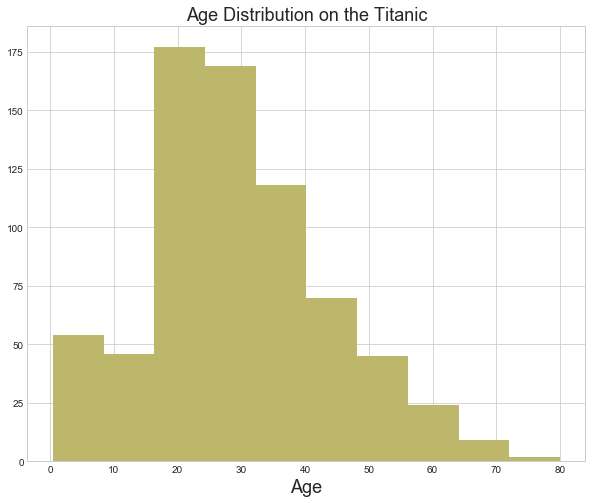

In [5]:
fig, ax = plt.subplots(figsize =(10, 8))
ax.hist(titanic['Age'], color = 'darkkhaki');

ax.set_title('Age Distribution on the Titanic', fontsize = 18)
ax.set_xlabel('Age', fontsize = 18);


* Findings
* The ages of passengers aboard the titanic ship was from 0 to 80 years of age
* Ages 20 - 40 years had the maximum number of passengers on the titanic ship



.

In [6]:
titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [7]:
#calculating the genders of passengers according to class
gender_class = pd.crosstab(titanic['Pclass'], titanic['Sex'])
gender_class

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


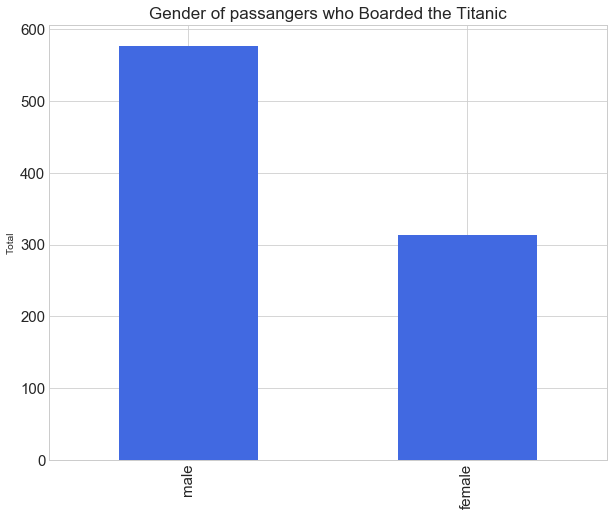

In [8]:
titanic['Sex'].value_counts().plot(kind = 'bar', fontsize  = 15, figsize = (10, 8), color ='royalblue');

plt.title("Gender of passangers who Boarded the Titanic", fontsize = 17)
plt.ylabel("Total")
plt.rc('axes', labelsize= 15);

* Findings
* Males who boarded the titanic were higher in numbers than females
* 65% of the people on board the titanic were males while 35% were female

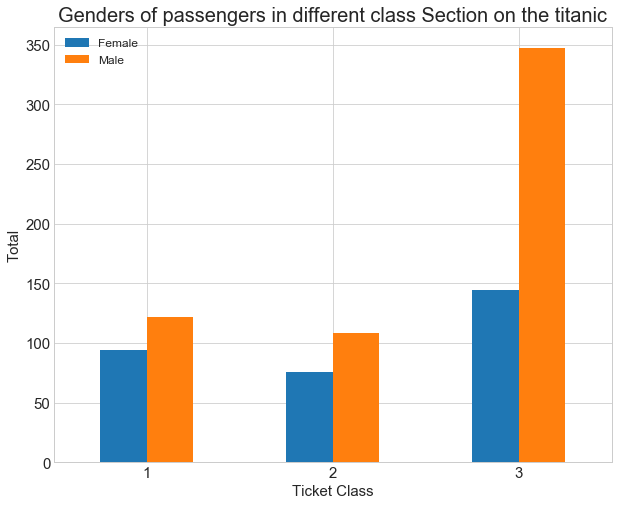

In [9]:

gender_class.plot(kind = 'bar', fontsize = 15, figsize = (10, 8));      
plt.title("Genders of passengers in different class Section on the titanic", fontsize = 20)
plt.xlabel("Ticket Class")
plt.ylabel("Total")
plt.legend(["Female", "Male"], fontsize = 12);
plt.xticks(rotation=0);
plt.rc('axes', labelsize= 16);
plt.rc('figure', titlesize= 16);

In [10]:
titanic['alive'] = titanic['Survived'] == 1
titanic['fatality'] = titanic['Survived'] == 0

titanic["alive"] = titanic["alive"].astype(int)
titanic['fatality'] = titanic['fatality'].astype(int)

In [11]:
survival_rate = pd.crosstab(titanic['Sex'], titanic['Survived'])
survival_rate

Survived,0,1
Sex,,
female,81,233
male,468,109


In [12]:
survival_class = pd.crosstab(titanic['Pclass'], titanic['Survived'])
survival_class

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


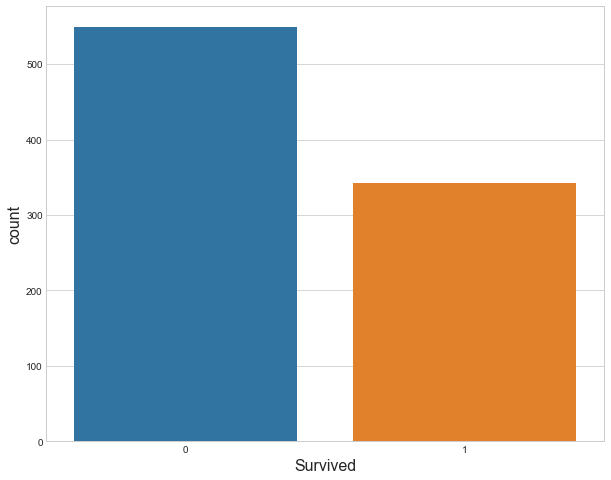

In [13]:
fig, ax = plt.subplots(figsize =(10,8))
ax = sns.countplot(titanic['Survived'])

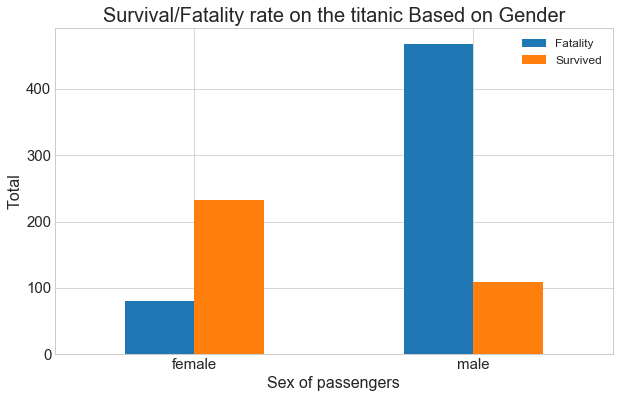

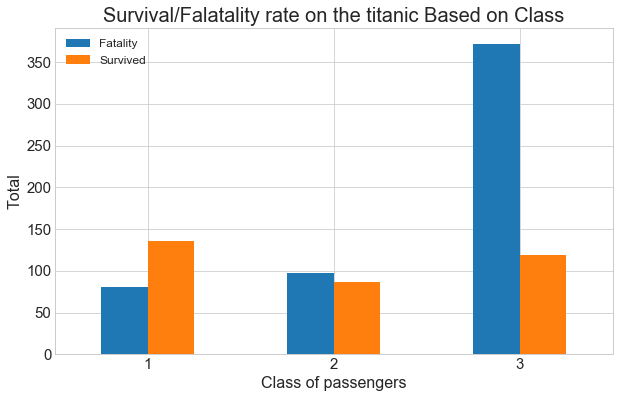

In [87]:
#Finding the survival and fatality rate on the titanic based on gender

survival_rate.plot(kind = 'bar', fontsize = 15, figsize = (10, 6));      
plt.title("Survival/Fatality rate on the titanic Based on Gender", fontsize = 20)
plt.xlabel("Sex of passengers")
plt.ylabel("Total")
plt.legend(["Fatality", "Survived"], fontsize = 12);
plt.xticks(rotation=0);
plt.rc('axes', labelsize= 16);
plt.rc('figure', titlesize= 16);

#Finding the survival and fatality rate on the titanic base on class
survival_class.plot(kind = 'bar', fontsize = 15, figsize = (10, 6));
plt.title("Survival/Falatality rate on the titanic Based on Class", fontsize = 20)
plt.xlabel("Class of passengers")
plt.ylabel("Total")
plt.legend(["Fatality", "Survived"], fontsize = 12);
plt.xticks(rotation=0);
plt.rc('axes', labelsize= 16);
plt.rc('figure', titlesize= 16);

## Findings on Gender
* Females had a higher survival rate compared to their male counterpart
* 74% of females survived the titanic crash while 26% did not survived.
* 19% of males survived the titanic crash while 81% of male did not survived
<br />
<br />

## Findings base on Class
* First class had a survival rate of 62% and a fatality rate of 38%
* second class had a survival rate of 47% and a fatality rate of 53%
* third class had a survival rate of 24% and a fatality rate of 76% 

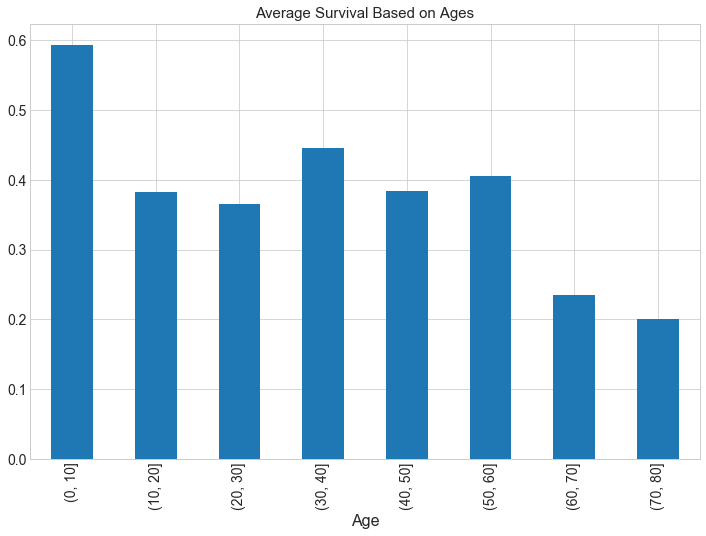

In [15]:
#Survival of the titanic base on Age
import matplotlib as mpl
mpl.rcParams['font.size'] = 14

group_age = pd.cut(titanic['Age'], np.arange(0, 90, 10))
group_ages = titanic.groupby(group_age).mean()
group_ages['Survived'].plot.bar(figsize =(12, 8));
plt.title('Average Survival Based on Ages', fontsize = 15);

#### Findings
The Graph above depicts the mean survival age group on the titanic. The highest Survival age group was 0 to 10 years which made
sense because of the children first evacuation method on the titanic

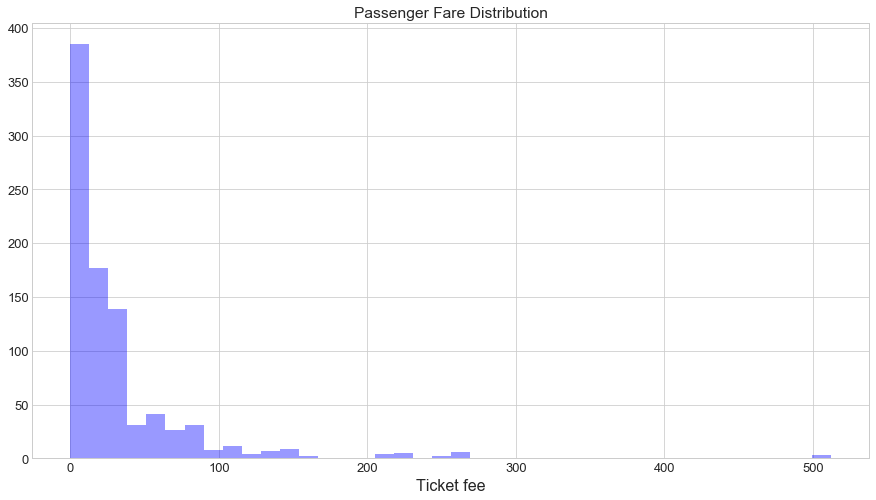

In [88]:
# Calculating the Passenger Fare distribution
import matplotlib as mpl
mpl.rcParams['font.size'] = 13

plt.figure(figsize = (15, 8))
sns.distplot(titanic['Fare'], kde=False, bins = 40, color = 'b')
plt.title('Passenger Fare Distribution')
plt.xlabel('Ticket fee')
plt.show()

"Most passenger fares were spread between 0 and 100 pounce. The data also reveals an outlier fare of 500 pounce made by 2 passengers in first class.

In [17]:
ticket = pd.crosstab(titanic['Pclass'], titanic['Fare'] )

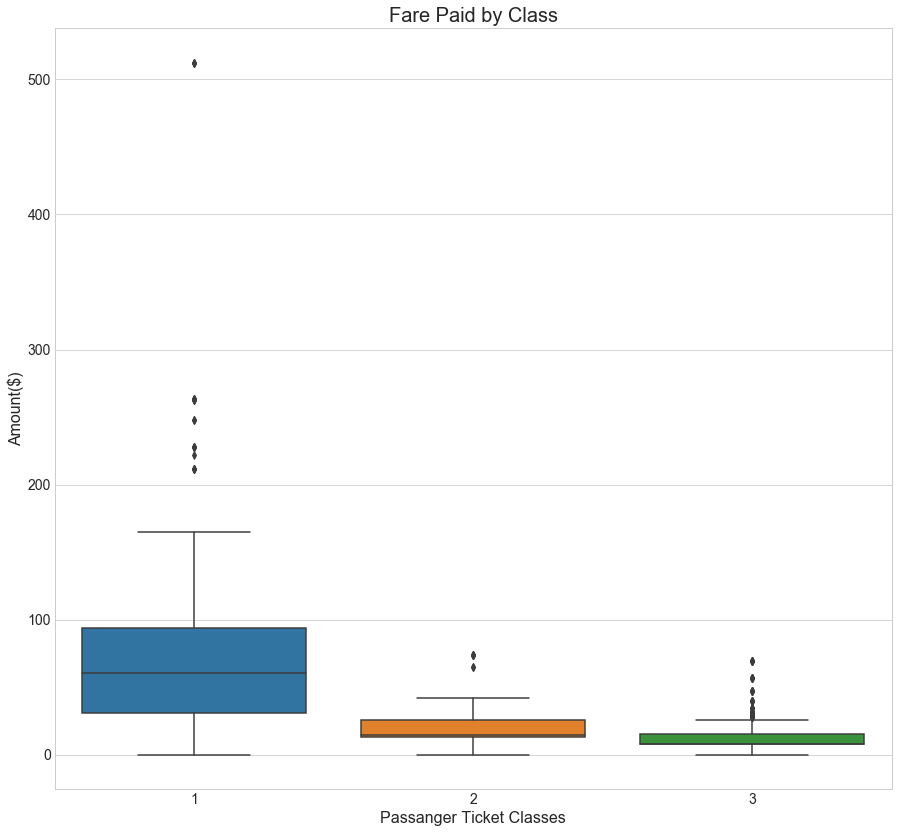

In [18]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 14


plt.figure(figsize = (15, 14))
sns.boxplot( data = titanic, x = 'Pclass', y= 'Fare')
plt.title("Fare Paid by Class", fontsize = 20)
plt.xlabel("Passanger Ticket Classes")
plt.ylabel("Amount($)")
plt.show()

.

In [19]:
people_aboard = titanic['Name'].value_counts().sum()

In [20]:
new = pd.crosstab(titanic['Embarked'], people_aboard)
new

col_0,891
Embarked,
C,168
Q,77
S,644


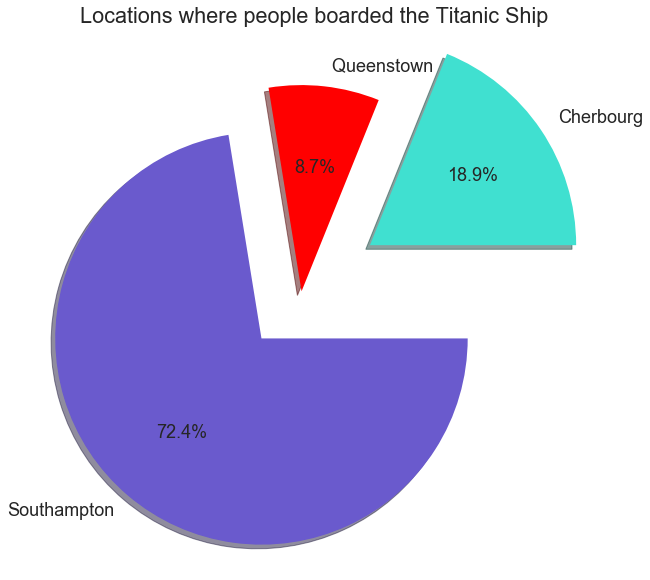

In [21]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 18

#Creating Labels
labels = ['Cherbourg', ' Queenstown', 'Southampton' ]

# creating Explode matrix
explode = (0.4, 0.0, 0.3)

#Creating colour options
colors = ['turquoise', 'red', 'slateblue']

fig, ax = plt.subplots(figsize = (10, 10))
ax.pie(new.values, explode = explode, labels = labels , colors = colors, shadow = True, autopct = '%1.1f%%');
ax.axis('equal');

ax.set(title = 'Locations where people boarded the Titanic Ship');

* Findings
* The according to the dataset the majority of the titanic passangers boarded the ship from Southampton

In [22]:
embarked_survived = pd.crosstab(titanic['Embarked'], titanic['Survived'])

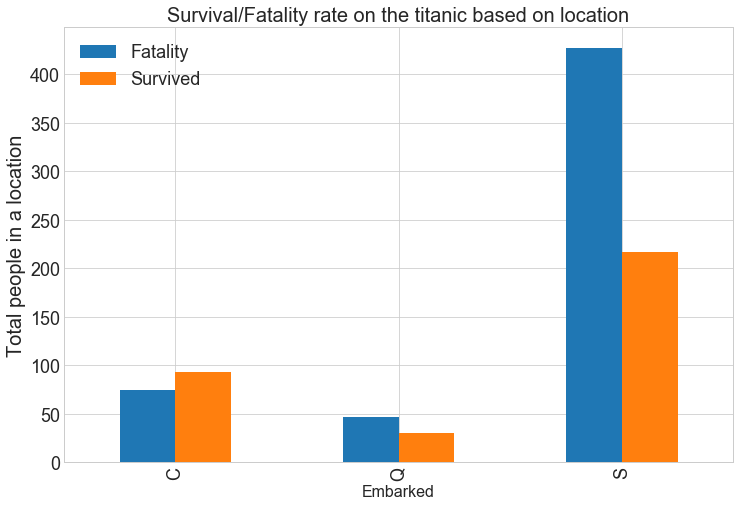

In [23]:
embarked_survived.plot.bar(figsize = (12, 8));
plt.legend(['Fatality', 'Survived'])
plt.title('Survival/Fatality rate on the titanic based on location', fontsize = 20)
plt.ylabel('Total people in a location', fontsize = 20);

### Data Preprocessing

In [24]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,alive,fatality
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


In [25]:
# Converting Strings to categories
for label, content in titanic.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

Name
Sex
Ticket
Cabin
Embarked


In [26]:
for label, content in titanic.items():
    if pd.api.types.is_string_dtype(content):
        titanic[label] = content.astype('category')

In [27]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null category
Sex            891 non-null category
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null category
Fare           891 non-null float64
Cabin          204 non-null category
Embarked       889 non-null category
alive          891 non-null int32
fatality       891 non-null int32
dtypes: category(5), float64(2), int32(2), int64(5)
memory usage: 141.4 KB


In [28]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
alive            0
fatality         0
dtype: int64

In [29]:
#Filling missing columns on our dataset
for label, content in titanic.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            titanic[label] = content.fillna(content.mean())
            
    if pd.api.types.is_categorical_dtype(content):
        if pd.isnull(content).sum():
            titanic[label] = pd.Categorical(content).codes+1

In [30]:
titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
alive          0
fatality       0
dtype: int64

### Feature Encoding / Feature Engineering

In [31]:
titanic.drop(columns =['Name', 'PassengerId', 'alive', 'fatality', 'Ticket'], axis=1, inplace = True)

In [32]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,0,3
1,1,1,female,38.0,1,0,71.2833,82,1
2,1,3,female,26.0,0,0,7.9250,0,3
3,1,1,female,35.0,1,0,53.1000,56,3
4,0,3,male,35.0,0,0,8.0500,0,3


## Splitting the dataset into Feature and Label matrix

In [33]:
#Creating a feature matrix
x = titanic.drop(['Survived'], axis = 1)
# Creating a label matrix
y = titanic['Survived']

In [34]:
X = pd.get_dummies(x)

In [35]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,Sex_female,Sex_male
0,3,22.0,1,0,7.2500,0,3,0,1
1,1,38.0,1,0,71.2833,82,1,1,0
2,3,26.0,0,0,7.9250,0,3,1,0
3,1,35.0,1,0,53.1000,56,3,1,0
4,3,35.0,0,0,8.0500,0,3,0,1


In [36]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = 0.2)

### Importing machine learning model for

In [37]:
boost = xgb.XGBClassifier(objective='binary:logistic')
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNeighbor": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(n_estimators = 100),
           "Support vector Classifier (SVC)" : SVC(),
            'XGBOOST': boost}

# Create a function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    
    #Setting a random seed
    np.random.seed(23)
    

    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        
        # Fit the model to the data
        model.fit(x_train, y_train)
        # Evaluate the model andppend its score to model_scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [38]:

evaluate_model = fit_and_score(models = models,
                              x_train = x_train,
                              x_test = x_test,
                              y_train = y_train,
                              y_test = y_test)

evaluate_model

{'Logistic Regression': 0.8547486033519553,
 'KNeighbor': 0.7206703910614525,
 'Random Forest': 0.8435754189944135,
 'Support vector Classifier (SVC)': 0.7318435754189944,
 'XGBOOST': 0.8491620111731844}

### Visual Comparisms

In [39]:
visual = pd.DataFrame(evaluate_model, index = ['accuracy'])



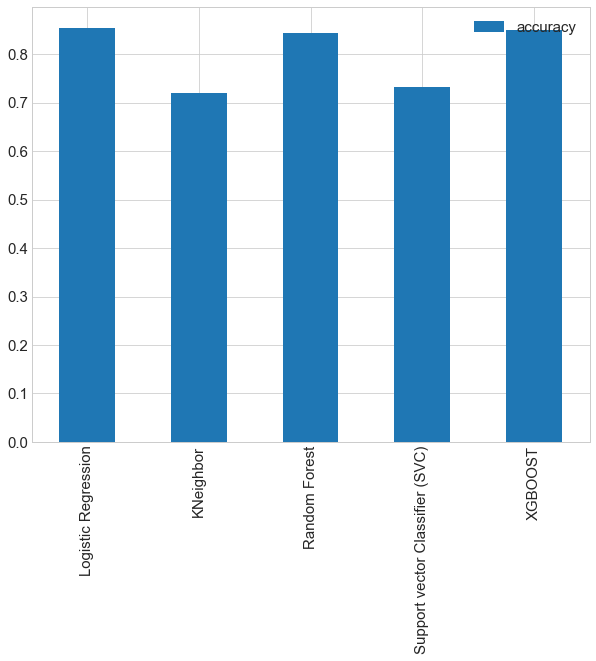

In [40]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 15

visual.T.plot.bar(figsize = (10, 8));

In [41]:
train_scores = []
test_scores = []



#creating different values for neighbors
neigh_range = range(1, 30)

#assigning Kneighbours to an instance
neigh = KNeighborsClassifier()

#looping through neighbours
for i in neigh_range:
    #creating a random seed to produce constant result.
    np.random.seed(23)
    
    neigh.set_params(n_neighbors = i)
    
    #fitting the algorithm
    neigh.fit(x_train, y_train)
    
     # Update the training scores list
    train_scores.append(neigh.score(x_train, y_train))
    
    # Update the test scores list
    test_scores.append(neigh.score(x_test, y_test))

In [42]:
train_scores

[0.9873595505617978,
 0.8455056179775281,
 0.851123595505618,
 0.8047752808988764,
 0.8019662921348315,
 0.7879213483146067,
 0.7851123595505618,
 0.7851123595505618,
 0.7907303370786517,
 0.7626404494382022,
 0.7626404494382022,
 0.7542134831460674,
 0.7556179775280899,
 0.7359550561797753,
 0.7401685393258427,
 0.7457865168539326,
 0.7415730337078652,
 0.7331460674157303,
 0.7331460674157303,
 0.7345505617977528,
 0.7373595505617978,
 0.7317415730337079,
 0.7359550561797753,
 0.7162921348314607,
 0.7191011235955056,
 0.7191011235955056,
 0.7176966292134831,
 0.7148876404494382,
 0.7205056179775281]

In [43]:
test_scores

[0.7318435754189944,
 0.6983240223463687,
 0.7653631284916201,
 0.7206703910614525,
 0.7206703910614525,
 0.7150837988826816,
 0.7150837988826816,
 0.6983240223463687,
 0.7094972067039106,
 0.7206703910614525,
 0.7094972067039106,
 0.7318435754189944,
 0.7150837988826816,
 0.7318435754189944,
 0.7150837988826816,
 0.7206703910614525,
 0.7374301675977654,
 0.7374301675977654,
 0.7374301675977654,
 0.7430167597765364,
 0.7374301675977654,
 0.7374301675977654,
 0.7430167597765364,
 0.7318435754189944,
 0.7206703910614525,
 0.7262569832402235,
 0.7150837988826816,
 0.7206703910614525,
 0.7206703910614525]

### Creating model visualisation

Maximum KNN score on the test data: 76.54%


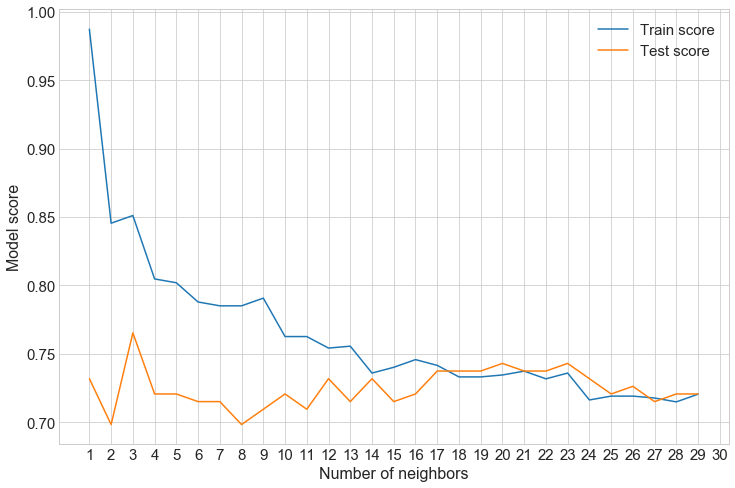

In [44]:
plt.figure(figsize = (12, 8))
plt.plot(neigh_range, train_scores, label="Train score")
plt.plot(neigh_range, test_scores, label="Test score")
plt.xlabel("Number of neighbors")
plt.xticks(np.arange(1, 31, 1))
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

## Tuning HyperParameter

In [45]:
# Creating a list of hyperparameters to tuned.
new_c = [0.1, 1, 10, 100, 1000]
new_gamma = [00.1, 0.1, 1, 10, 100,1000]

# instantiating the hyperparameter list to a dictionary.
paramsgrid = {'C': new_c, 'gamma':new_gamma}


#Instantiate machine learning algorithm
svc = SVC()

#Instantiate GridsearchCV function.
grid_search = GridSearchCV(svc, paramsgrid, verbose= True, cv=5)

#fitting Feature matrix into tuned machine learning model
grid_search.fit(x_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    4.0s finished


In [46]:
grid_search.best_params_

{'C': 10, 'gamma': 0.1}

In [47]:
clf = SVC(C=1, gamma = 0.1)

clf.fit(x_train, y_train);
clf.score(x_test, y_test)

0.7262569832402235

### Hyperparameter tuning for RandomForest and LogisticRegression

In [48]:

# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": [0.0001, 0.01, 0.05, 0.2, 1],
                "solver": ["newton-cg", "lbfgs", "liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24,26, 28, 30, 40, 50, 100],
 'min_samples_split': [2, 5, 10, 20, 30, 35, 40, 45, 50, 60, 70, 80, 100],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [49]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20, n_jobs = -1,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(x_train, y_train);

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   11.3s finished


In [50]:
rs_log_reg.best_params_

{'solver': 'lbfgs', 'C': 1}

In [51]:
rs_log_reg.score(x_test, y_test)

0.8547486033519553

In [52]:
# Setup random seed
np.random.seed(35)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid, cv=20, n_iter=100, verbose=True, n_jobs = -1)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(x_train, y_train);

Fitting 20 folds for each of 100 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   56.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed: 11.5min finished


In [53]:
rs_rf.best_params_

{'n_estimators': 1200,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 60,
 'bootstrap': False}

In [54]:
rs_rf.score(x_test, y_test)

0.8547486033519553

In [55]:
np.random.seed(23)
new_model = RandomForestClassifier(n_estimators = 400,
                                   min_samples_split = 10,
                                  min_samples_leaf = 4,
                                   max_depth = 70,
                                  max_features = 'auto',
                                  bootstrap = True)

new_model.fit(x_train, y_train);

In [56]:
new_model.score(x_test, y_test)

0.8435754189944135

## Hyperparameter tuning on XGBOOST

In [57]:
#Creating  a dictionary of hyperparameters for xgboost classifier
param_xgboost = {'n_estimators': [10, 50, 100, 150, 200, 250, 300, 350, 400],
                'max_depth': range(2, 20),
                 'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
                 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}

#setting up hyperparameter for xgboost classifier
xgboost = RandomizedSearchCV(xgb.XGBClassifier(objective='binary:logistic', nthread = 6), 
                           param_distributions=param_xgboost, cv=20, n_iter=100, verbose=True, n_jobs = -1)

xgboost.fit(x_train, y_train);

Fitting 20 folds for each of 100 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   41.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed: 10.1min finished


In [58]:
xgboost.best_params_

{'n_estimators': 350, 'max_depth': 7, 'learning_rate': 0.01, 'gamma': 0.9}

In [59]:
xgboost.score(x_test, y_test)

0.8379888268156425

## Predicting on the titanic Test Data

In [60]:
titanic_test = pd.read_csv('./RL_dataset/titanic/test.csv')

In [61]:
new_pred = titanic_test.copy()

In [62]:
titanic_test['Embarked'] = titanic['Embarked'].astype(int)

In [63]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,3
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,3
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,3
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,3


In [64]:
#checking for Missing number in the titanic test sets
titanic_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [65]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null category
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       891 non-null int16
Embarked    891 non-null int8
dtypes: category(1), float64(2), int16(1), int64(4), int8(1)
memory usage: 45.5 KB


In [66]:
#Filling missing numbers in the titanic dataset
for label, content in titanic_test.items():
    if pd.api.types.is_string_dtype(content):
        titanic_test[label] = content.astype('category')
        
#Filling missing columns on our dataset
for label, content in titanic_test.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            titanic_test[label] = content.fillna(content.median())
            
    if pd.api.types.is_categorical_dtype(content):
        if pd.isnull(content).sum():
            titanic_test[label] = pd.Categorical(content).codes+1

In [67]:
titanic_test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [68]:
titanic_test.drop(columns = ['Name', 'PassengerId', 'Ticket'], axis = 1, inplace=True)

In [69]:
titanic_test_data = pd.get_dummies(titanic_test)

In [84]:
y_pred = rs_rf.predict(titanic_test_data)
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [85]:
# Create DataFrame compatible with Kaggle submission requirements
submission = pd.DataFrame()
submission['PassengerID'] = new_pred['PassengerId']
submission['Survived'] = y_pred
submission.to_csv('./submission.csv', index = False)

In [86]:
submission

,PassengerID,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
